## Demonstration of Spoken Digits Classification

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

In [1]:
import glob
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from librosa.feature import mfcc

import os

In [2]:
path = '../data/free-spoken-digit-dataset/recordings/'  # path to dataset

In [3]:
def load_examples(path):
    
    X = list()
    Y = list()
    
    audiofiles = glob.glob(path, recursive=True)
    for filepath in audiofiles:
        x, fs = sf.read(filepath)
        x = x / np.max(np.abs(x))
        X.append(x)
        Y.append(int(os.path.basename(filepath)[0]))
    
    return X, Y, fs

# load examples
X, Y, fs = load_examples(path + '*.wav')

# determine maximum length of the examples
lengths = [len(x) for x in X]
N = np.max(lengths)

# append zeros to examples to equalize lengths
X = [np.concatenate((sample, np.zeros(N - len(sample)))) for sample in X]
X = np.array(X)
Y = np.array(Y)

In [4]:
print('Total number of examples: {}'.format(len(X)))
print('Number of samples per example: {}'.format(N))

Total number of examples: 3000
Number of samples per example: 18262


In [5]:
MFCC = [mfcc(y=sample, sr=fs, htk=True) for sample in X]
MFCC = np.array(MFCC)
MFCC = MFCC.reshape((-1, np.prod(MFCC.shape[1:])))

print('Total number of examples: {}'.format(MFCC.shape[0]))
print('Dimension of feature vectors: {}'.format(MFCC.shape[1]))

Total number of examples: 3000
Dimension of feature vectors: 720


In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

Y = to_categorical(Y, 10)

X_train, X_test, y_train, y_test = train_test_split(MFCC, Y, test_size=0.2)

In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

def dnn_model(input_shape=(720,), classes=10):
    
    inputs = Input(shape=input_shape)
    
    x = Dense(32, activation='relu')(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dense(classes, activation='softmax')(x)
    
    return Model(inputs, x)


model = dnn_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 720)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                23072     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)

Epoch 1/100
19/19 [==============================] - 4s 140ms/step - loss: 95.9311 - accuracy: 0.1053 - val_loss: 28.6143 - val_accuracy: 0.1100
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 20.6514 - accuracy: 0.1119 - val_loss: 10.4273 - val_accuracy: 0.1283
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 8.9887 - accuracy: 0.1203 - val_loss: 5.4868 - val_accuracy: 0.1633
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 4.7190 - accuracy: 0.1760 - val_loss: 3.2750 - val_accuracy: 0.2533
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 3.0354 - accuracy: 0.2624 - val_loss: 2.3075 - val_accuracy: 0.3150
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 2.1540 - accuracy: 0.3557 - val_loss: 1.8991 - val_accuracy: 0.3517
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 1.7794 - accuracy: 0.4152 - val_loss: 1.6503 - val_accuracy: 0.4233
Epoch 8

Epoch 59/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0663 - accuracy: 0.9789 - val_loss: 0.2512 - val_accuracy: 0.9283
Epoch 60/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0501 - accuracy: 0.9892 - val_loss: 0.2456 - val_accuracy: 0.9267
Epoch 61/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0584 - accuracy: 0.9863 - val_loss: 0.2524 - val_accuracy: 0.9217
Epoch 62/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0537 - accuracy: 0.9856 - val_loss: 0.2431 - val_accuracy: 0.9300
Epoch 63/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0454 - accuracy: 0.9901 - val_loss: 0.2532 - val_accuracy: 0.9217
Epoch 64/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0579 - accuracy: 0.9842 - val_loss: 0.2548 - val_accuracy: 0.9267
Epoch 65/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0493 - accuracy: 0.9864 - val_loss: 0.2557 - val_accuracy: 0.9283
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


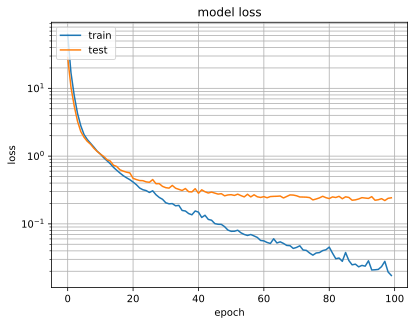

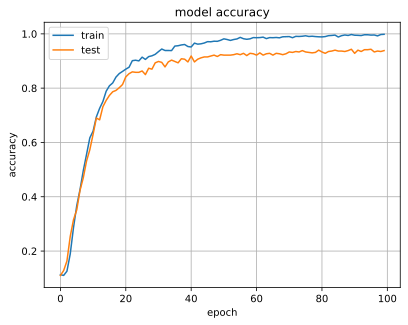

In [9]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.yscale('log')
plt.grid(True, which='both')

# summarize history for mse
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True, which='both')

In [10]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.92      0.97      0.95        73
           2       0.96      0.96      0.96        56
           3       0.88      0.79      0.84        48
           4       0.93      0.96      0.95        56
           5       0.96      0.95      0.96        57
           6       0.82      0.94      0.87        63
           7       1.00      0.94      0.97        67
           8       0.93      0.94      0.93        53
           9       1.00      0.91      0.96        70

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.